# Kmodes analysis
install pre reqs

In [2]:
#https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering
#pip install kmodes plotnine matplotlib scipy seaborn missingno plotly pyod pythresh gower


In [3]:
from kmodes.kmodes import KModes
import sklearn as skl

import pandas as pd

#df = pd.read_csv("iocs-export.csv",header=None,on_bad_lines='skip')
#https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
df = pd.read_csv("iocs-export.csv",delimiter=';', skiprows=0, low_memory=False)
#https://stackoverflow.com/questions//python-pandas-error-tokenizing-data

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
# Print the first 5 rows
df.head()

Dimension data: 33790 rows and 21 columns


,ip,port,protocol,version,xorkey,domains,host_header,first_seen,last_seen,delta_days,...,asn,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,submituri,watermark_hex,modifications,is_modified
0,81.95.5.146,443,https,"Cobalt Strike 3.6 (Dec 08, 2016)",105,81.95.5.146,NaN,04/07/18,26/11/18,145,...,201011,AS33891 Netzbetrieb GmbH,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/safebrowsing/rd/CINnu27nLO8hbHdfgmUtc2ihdmFyE...,0x0,modified_trial,True
1,122.116.41.237,80,http,"Cobalt Strike 3.6 (Dec 08, 2016)",105,122.116.41.237,NaN,04/07/18,04/07/18,1,...,3462,Data Communication Business Group,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/submit.php,0x0,normal,False
2,51.255.42.170,80,dns,"Cobalt Strike 3.4 (Jul 29, 2016)",105,"cdn.incdigest.com, freepics.incdigest.com, pro...",NaN,04/07/18,05/12/18,154,...,16276,OVH SAS,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,0,0,0,/submit.php,0x0,normal,False
3,51.38.187.74,443,https,"Cobalt Strike 3.8 (May 23, 2017)",105,51.38.187.74,NaN,04/07/18,04/07/18,1,...,16276,OVH SAS,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/submit.php,0x0,normal,False
4,54.147.59.212,80,http,"Cobalt Strike 3.10 (Dec 11, 2017)",105,ww2.foodprepsolutions.com,www.imdb.com,04/07/18,16/08/18,43,...,14618,AMAZON-AES,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/name/nm0954753/,0x77254a2e,normal,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33790 entries, 0 to 33789
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ip               33790 non-null  object
 1   port             33790 non-null  int64 
 2   protocol         33790 non-null  object
 3   version          33790 non-null  object
 4   xorkey           33790 non-null  int64 
 5   domains          33784 non-null  object
 6   host_header      9865 non-null   object
 7   first_seen       33790 non-null  object
 8   last_seen        33790 non-null  object
 9   delta_days       33790 non-null  int64 
 10  country          33790 non-null  object
 11  asn              33790 non-null  int64 
 12  org              33790 non-null  object
 13  user_agent       33787 non-null  object
 14  spawnto_x86      33790 non-null  object
 15  spawnto_x64      33790 non-null  object
 16  procinj_execute  33790 non-null  object
 17  submituri        33789 non-null

In [6]:
df.select_dtypes('object').nunique()

ip                 18336
protocol               3
version               19
domains            18563
host_header         2593
first_seen           151
last_seen            150
country               82
org                  713
user_agent          1122
spawnto_x86          295
spawnto_x64          294
procinj_execute      282
submituri           2201
watermark_hex       5117
modifications         17
dtype: int64

In [7]:
df.describe()

,port,xorkey,delta_days,asn
count,33790.000000,33790.000000,33790.000000,33790.000000
mean,399.628470,61.134300,27.068955,58348.661675
std,1001.190954,25.916425,56.474003,79128.654958
min,53.000000,46.000000,1.000000,18.000000
25%,80.000000,46.000000,1.000000,16509.000000
50%,443.000000,46.000000,6.000000,36352.000000
75%,443.000000,105.000000,28.000000,53363.000000
max,60000.000000,252.000000,1123.000000,399804.000000


In [8]:
df.isna().sum()

ip                     0
port                   0
protocol               0
version                0
xorkey                 0
domains                6
host_header        23925
first_seen             0
last_seen              0
delta_days             0
country                0
asn                    0
org                    0
user_agent             3
spawnto_x86            0
spawnto_x64            0
procinj_execute        0
submituri              1
watermark_hex          0
modifications          0
is_modified            0
dtype: int64

In [9]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks


In [10]:
df = pd.read_csv("iocs-export.csv",delimiter=';', skiprows=0, low_memory=False)

In [11]:
df.head()

,ip,port,protocol,version,xorkey,domains,host_header,first_seen,last_seen,delta_days,...,asn,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,submituri,watermark_hex,modifications,is_modified
0,81.95.5.146,443,https,"Cobalt Strike 3.6 (Dec 08, 2016)",105,81.95.5.146,NaN,04/07/18,26/11/18,145,...,201011,AS33891 Netzbetrieb GmbH,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/safebrowsing/rd/CINnu27nLO8hbHdfgmUtc2ihdmFyE...,0x0,modified_trial,True
1,122.116.41.237,80,http,"Cobalt Strike 3.6 (Dec 08, 2016)",105,122.116.41.237,NaN,04/07/18,04/07/18,1,...,3462,Data Communication Business Group,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/submit.php,0x0,normal,False
2,51.255.42.170,80,dns,"Cobalt Strike 3.4 (Jul 29, 2016)",105,"cdn.incdigest.com, freepics.incdigest.com, pro...",NaN,04/07/18,05/12/18,154,...,16276,OVH SAS,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,0,0,0,/submit.php,0x0,normal,False
3,51.38.187.74,443,https,"Cobalt Strike 3.8 (May 23, 2017)",105,51.38.187.74,NaN,04/07/18,04/07/18,1,...,16276,OVH SAS,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/submit.php,0x0,normal,False
4,54.147.59.212,80,http,"Cobalt Strike 3.10 (Dec 11, 2017)",105,ww2.foodprepsolutions.com,www.imdb.com,04/07/18,16/08/18,43,...,14618,AMAZON-AES,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/name/nm0954753/,0x77254a2e,normal,False


In [12]:
df.columns

Index(['ip', 'port', 'protocol', 'version', 'xorkey', 'domains', 'host_header',
       'first_seen', 'last_seen', 'delta_days', 'country', 'asn', 'org',
       'user_agent', 'spawnto_x86', 'spawnto_x64', 'procinj_execute',
       'submituri', 'watermark_hex', 'modifications', 'is_modified'],
      dtype='object')

In [13]:
df_analysis = df [['ip', 'port', 'protocol', 'version', 'domains', 'host_header', 'delta_days', 'country', 'org', 'user_agent', 'spawnto_x86', 'spawnto_x64', 'procinj_execute', 'modifications', 'is_modified']]

In [14]:
df_analysis['delta_days_bin'] = pd.cut(df_analysis['delta_days'], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000], 
                              labels=['0-100', '100-200', '200-300', '300-400','400-500','500-600','600-700', '700-800','800-900', '900-1000','1000-2000'])
df_analysis  = df_analysis.drop('delta_days',axis = 1)

In [15]:
import csv
#export_df.to_csv("iocs-export_sem_index.csv",index=False)
#User agent
#correlação com algum dataset de dominio (com isso é possivel validar se foi utilizado dominio temporario, alexa top1m)
#quantidade de dias que um beacon ficou disponivel na internet
#analise do IP (avaliar se tem alguma API disponivel no trabalho)



df_analysis.to_csv("test-export.csv", sep=";", quoting=csv.QUOTE_ALL, index=False)

In [16]:
df_analysis.head()

,ip,port,protocol,version,domains,host_header,country,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,modifications,is_modified,delta_days_bin
0,81.95.5.146,443,https,"Cobalt Strike 3.6 (Dec 08, 2016)",81.95.5.146,NaN,Germany,AS33891 Netzbetrieb GmbH,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,modified_trial,True,100-200
1,122.116.41.237,80,http,"Cobalt Strike 3.6 (Dec 08, 2016)",122.116.41.237,NaN,Taiwan,Data Communication Business Group,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,0-100
2,51.255.42.170,80,dns,"Cobalt Strike 3.4 (Jul 29, 2016)","cdn.incdigest.com, freepics.incdigest.com, pro...",NaN,France,OVH SAS,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,0,0,0,normal,False,100-200
3,51.38.187.74,443,https,"Cobalt Strike 3.8 (May 23, 2017)",51.38.187.74,NaN,France,OVH SAS,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,0-100
4,54.147.59.212,80,http,"Cobalt Strike 3.10 (Dec 11, 2017)",ww2.foodprepsolutions.com,www.imdb.com,United States,AMAZON-AES,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,0-100


In [17]:
df_analysis.shape

(33790, 15)

In [18]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33790 entries, 0 to 33789
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ip               33790 non-null  object  
 1   port             33790 non-null  int64   
 2   protocol         33790 non-null  object  
 3   version          33790 non-null  object  
 4   domains          33784 non-null  object  
 5   host_header      9865 non-null   object  
 6   country          33790 non-null  object  
 7   org              33790 non-null  object  
 8   user_agent       33787 non-null  object  
 9   spawnto_x86      33790 non-null  object  
 10  spawnto_x64      33790 non-null  object  
 11  procinj_execute  33790 non-null  object  
 12  modifications    33790 non-null  object  
 13  is_modified      33790 non-null  bool    
 14  delta_days_bin   33790 non-null  category
dtypes: bool(1), category(1), int64(1), object(12)
memory usage: 3.4+ MB


In [19]:
df_analysis.isnull().sum()*100/df_analysis.shape[0]

ip                  0.000000
port                0.000000
protocol            0.000000
version             0.000000
domains             0.017757
host_header        70.804972
country             0.000000
org                 0.000000
user_agent          0.008878
spawnto_x86         0.000000
spawnto_x64         0.000000
procinj_execute     0.000000
modifications       0.000000
is_modified         0.000000
delta_days_bin      0.000000
dtype: float64

In [20]:
df_analysis_copy = df_analysis.copy()

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_analysis = df_analysis.apply(le.fit_transform)
df_analysis.head()

,ip,port,protocol,version,domains,host_header,country,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,modifications,is_modified,delta_days_bin
0,17601,2,2,9,9874,2593,21,33,662,193,182,0,4,1,1
1,2858,1,1,9,2140,2593,70,169,56,193,182,0,13,0,0
2,15685,1,0,7,11580,2593,20,459,921,268,263,0,13,0,1
3,15687,2,2,11,8953,2593,20,459,108,193,182,0,13,0,0
4,16108,1,1,0,17908,2422,78,21,111,193,182,0,13,0,0


In [22]:
# Importing Libraries
from kmodes.kmodes import KModes

In [23]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_analysis)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7418, cost: 236255.0
Run 1, iteration: 2/100, moves: 5101, cost: 232429.0
Run 1, iteration: 3/100, moves: 1915, cost: 232429.0


In [24]:
fitClusters_cao

array([0, 4, 4, ..., 2, 1, 1], dtype=uint16)

In [25]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_analysis.columns

In [26]:
clusterCentroidsDf

,ip,port,protocol,version,domains,host_header,country,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,modifications,is_modified,delta_days_bin
0,4355,2,2,13,662,2593,78,28,662,193,182,249,15,1,0
1,8048,1,1,13,4751,2593,13,563,780,193,182,249,15,1,0
2,8115,2,2,14,4794,2593,13,271,780,193,182,0,1,1,0
3,7227,1,1,14,4411,2593,78,158,2,193,182,249,1,1,0
4,15924,2,2,6,10546,2593,78,20,662,193,182,0,13,0,0


In [27]:
km_huang = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_analysis)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13879, cost: 239876.0
Run 1, iteration: 2/100, moves: 7856, cost: 234776.0
Run 1, iteration: 3/100, moves: 2709, cost: 234329.0
Run 1, iteration: 4/100, moves: 161, cost: 234329.0


In [28]:
fitClusters_huang

array([1, 2, 1, ..., 3, 0, 0], dtype=uint16)

In [29]:
beacon = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_analysis)
    beacon.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 282658.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3438, cost: 261479.0
Run 1, iteration: 2/100, moves: 5, cost: 261479.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4657, cost: 255883.0
Run 1, iteration: 2/100, moves: 1297, cost: 255883.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4680, cost: 251510.0
Run 1, iteration: 2/100, moves: 2582, cost: 251116.0
Run 1, iteration: 3/100, moves: 36, cost: 251116.0


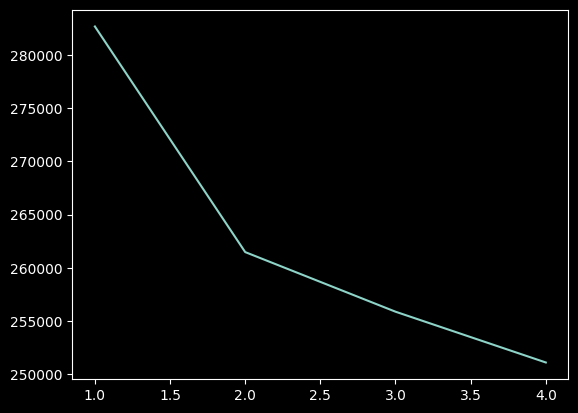

In [30]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,beacon)

In [31]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_analysis)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7418, cost: 236255.0
Run 1, iteration: 2/100, moves: 5101, cost: 232429.0
Run 1, iteration: 3/100, moves: 1915, cost: 232429.0


In [32]:
fitClusters_cao

array([0, 4, 4, ..., 2, 1, 1], dtype=uint16)

In [33]:
df_analysis = df_analysis_copy.reset_index()

In [34]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_analysis, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [35]:
combinedDf.head()

,ip,port,protocol,version,domains,host_header,country,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,modifications,is_modified,delta_days_bin,cluster_predicted
0,81.95.5.146,443,https,"Cobalt Strike 3.6 (Dec 08, 2016)",81.95.5.146,NaN,Germany,AS33891 Netzbetrieb GmbH,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,modified_trial,True,100-200,0
1,122.116.41.237,80,http,"Cobalt Strike 3.6 (Dec 08, 2016)",122.116.41.237,NaN,Taiwan,Data Communication Business Group,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,0-100,4
2,51.255.42.170,80,dns,"Cobalt Strike 3.4 (Jul 29, 2016)","cdn.incdigest.com, freepics.incdigest.com, pro...",NaN,France,OVH SAS,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,0,0,0,normal,False,100-200,4
3,51.38.187.74,443,https,"Cobalt Strike 3.8 (May 23, 2017)",51.38.187.74,NaN,France,OVH SAS,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,0-100,4
4,54.147.59.212,80,http,"Cobalt Strike 3.10 (Dec 11, 2017)",ww2.foodprepsolutions.com,www.imdb.com,United States,AMAZON-AES,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,0-100,4


In [36]:
import csv
#export_df.to_csv("iocs-export_sem_index.csv",index=False)
#User agent
#correlação com algum dataset de dominio (com isso é possivel validar se foi utilizado dominio temporario, alexa top1m)
#quantidade de dias que um beacon ficou disponivel na internet
#analise do IP (avaliar se tem alguma API disponivel no trabalho)



combinedDf.to_csv("cluster-export.csv", sep=";", quoting=csv.QUOTE_ALL, index=False)

In [84]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]

In [85]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11890 entries, 0 to 33786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ip                 11890 non-null  object  
 1   port               11890 non-null  int64   
 2   protocol           11890 non-null  object  
 3   version            11890 non-null  object  
 4   domains            11890 non-null  object  
 5   host_header        3328 non-null   object  
 6   country            11890 non-null  object  
 7   org                11890 non-null  object  
 8   user_agent         11890 non-null  object  
 9   spawnto_x86        11890 non-null  object  
 10  spawnto_x64        11890 non-null  object  
 11  procinj_execute    11890 non-null  object  
 12  modifications      11890 non-null  object  
 13  is_modified        11890 non-null  bool    
 14  delta_days_bin     11890 non-null  category
 15  cluster_predicted  11890 non-null  uint16  
dtypes: b

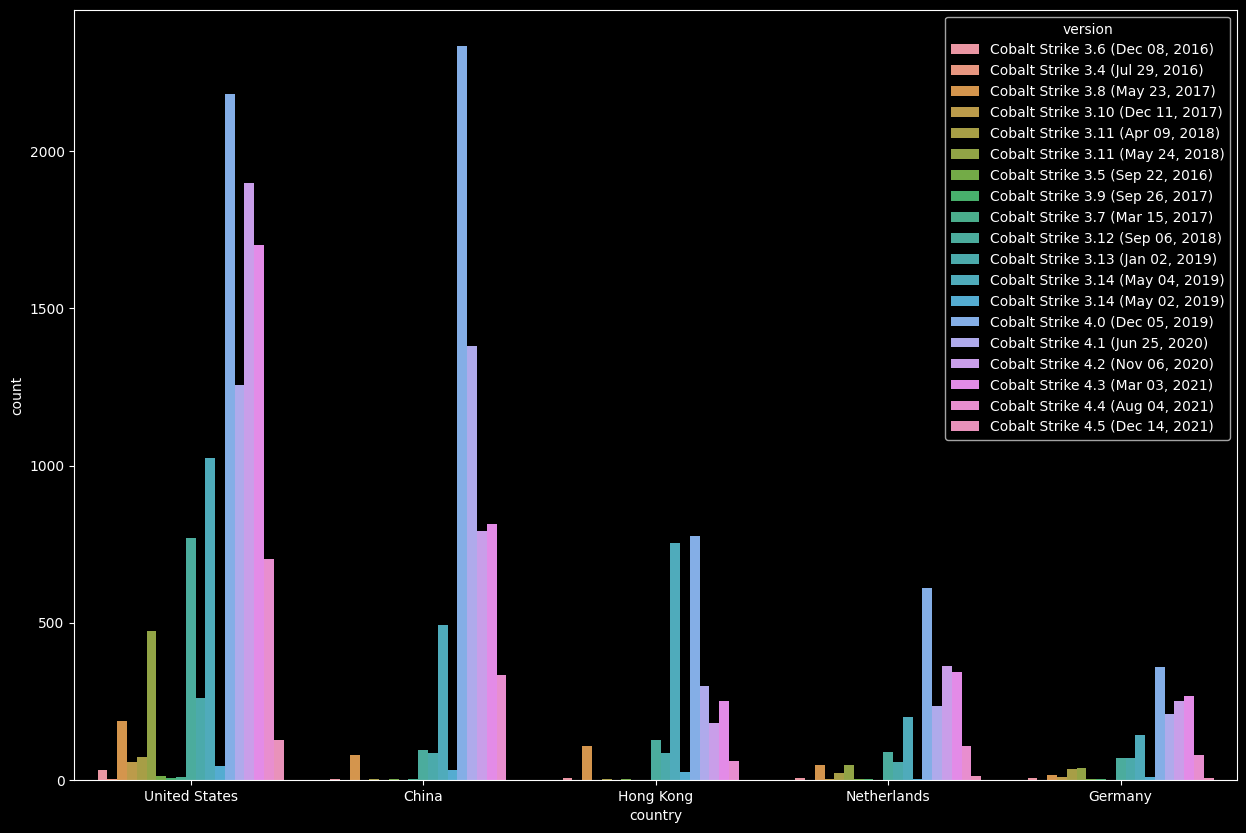

In [127]:
plt.subplots(figsize = (15,10))
sns.countplot(x=combinedDf['country'],order=combinedDf['country'].value_counts().iloc[:5].index,hue=combinedDf['version'])
plt.show()

<AxesSubplot: xlabel='country', ylabel='Density'>

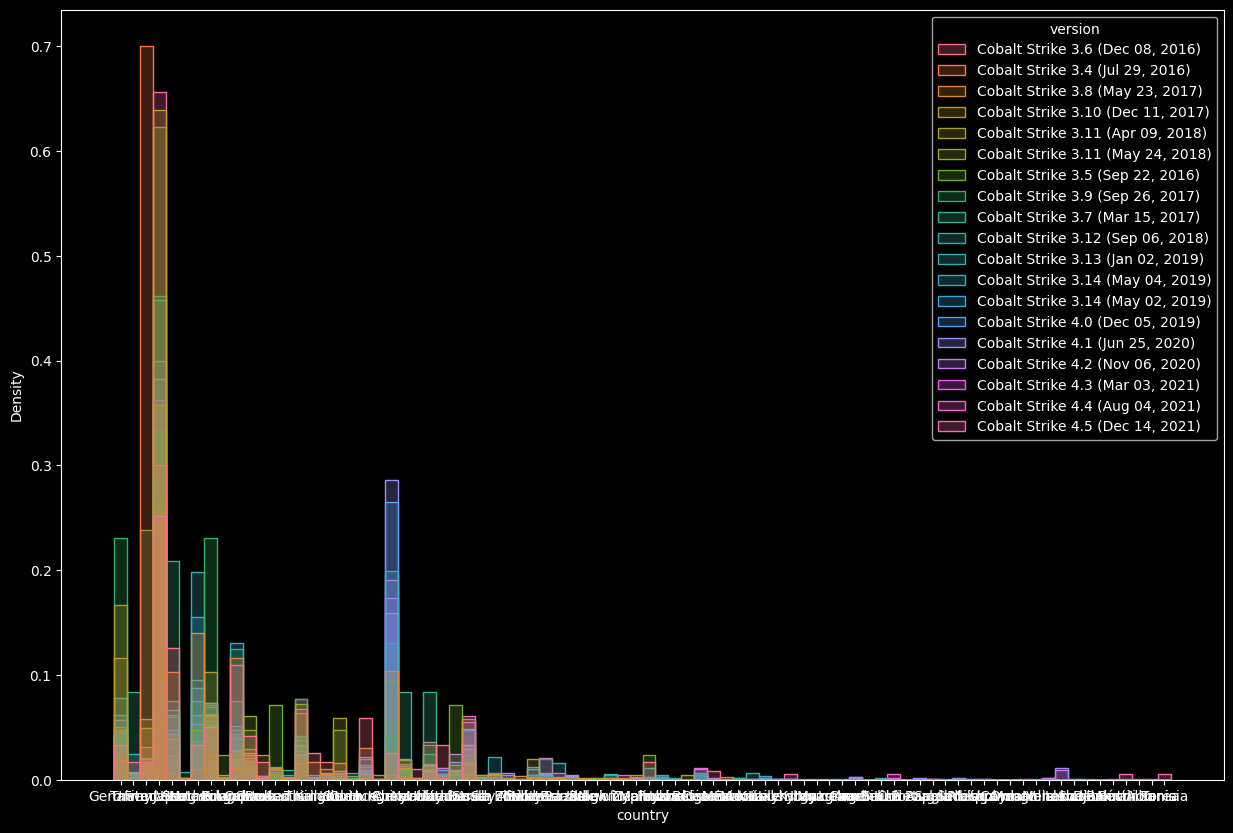

In [171]:
plt.subplots(figsize = (15,10))

sns.histplot(
    combinedDf, x="country", hue="version", element="step",
    stat="density", common_norm=False,
)

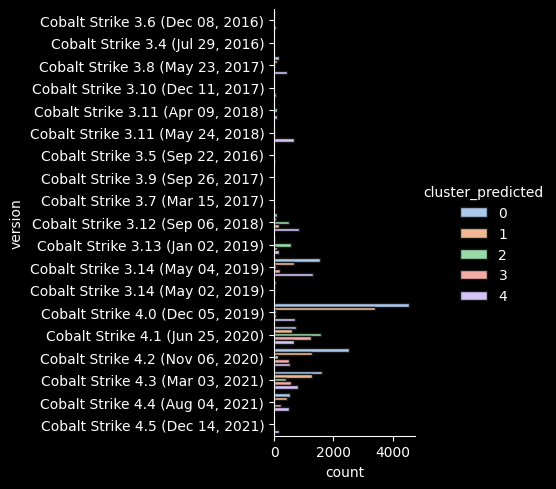

In [159]:
sns.catplot(
    data=combinedDf, y='version', hue="cluster_predicted", kind="count",
    palette="pastel", edgecolor=".10"
)


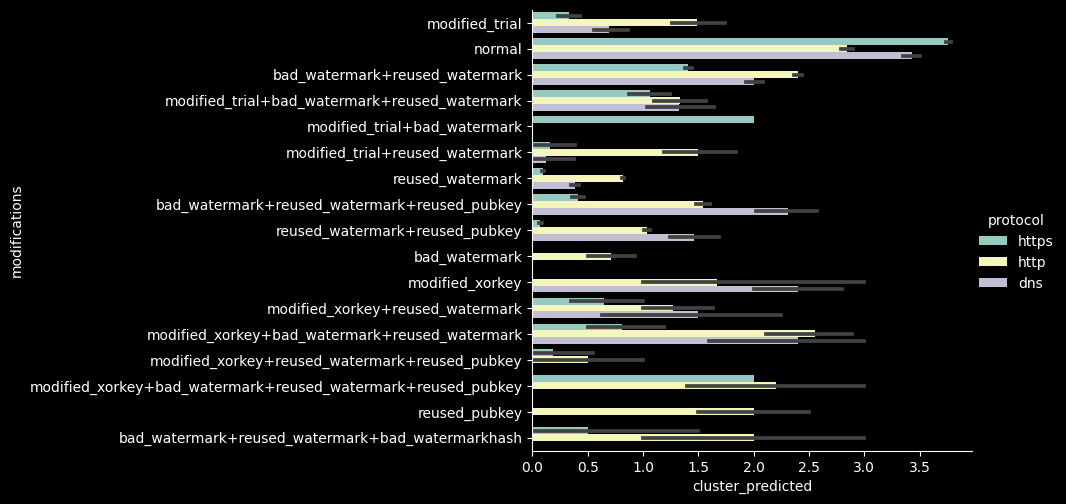

In [110]:
sns.catplot(
    data=combinedDf, x="cluster_predicted", y="modifications", hue="protocol", kind="bar",
)

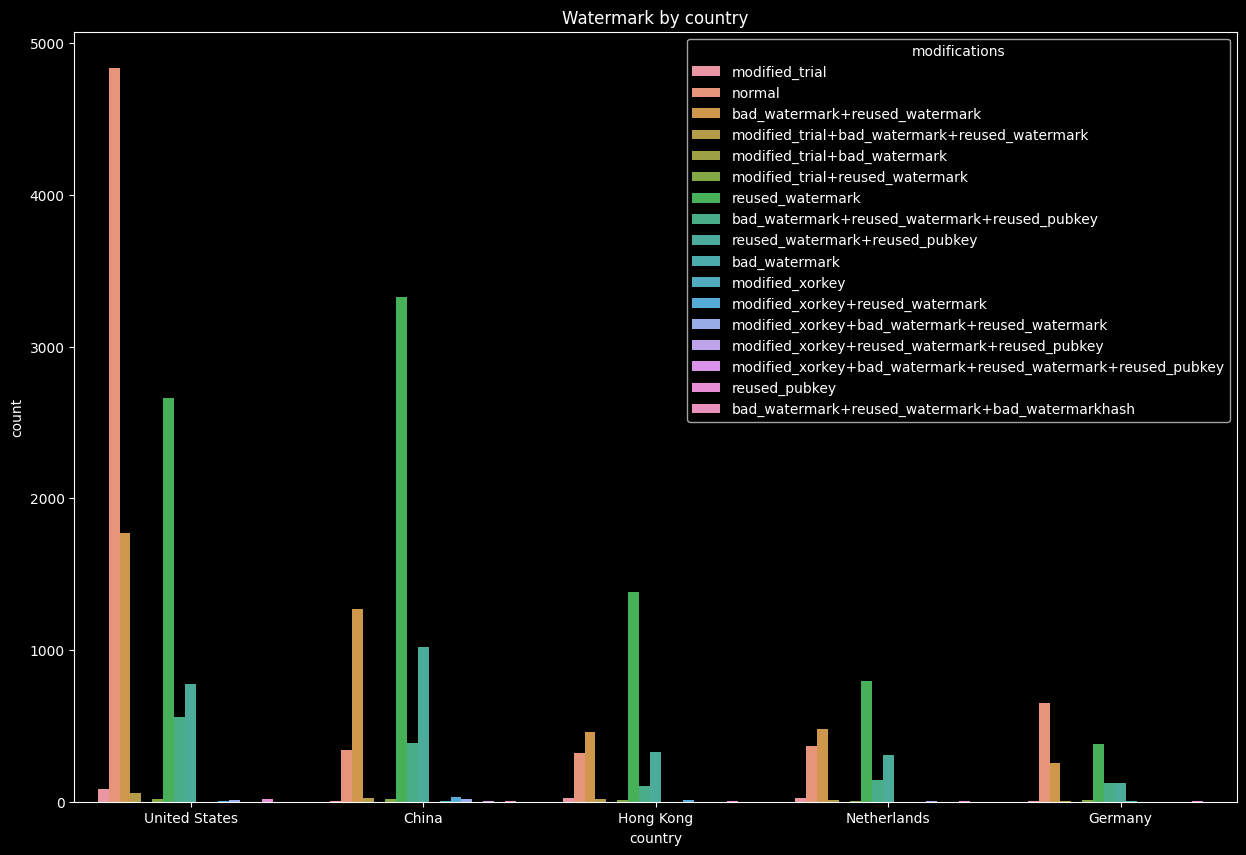

In [103]:
plt.subplots(figsize = (15,10))
sns.countplot(x=combinedDf['country'],order=combinedDf['country'].value_counts().iloc[:5].index,hue=combinedDf['modifications']).set(title='Watermark by country')
plt.show()


#import seaborn as sns
#titanic = sns.load_dataset("titanic")
#sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d",
 #             order=titanic.deck.value_counts().iloc[:3].index)

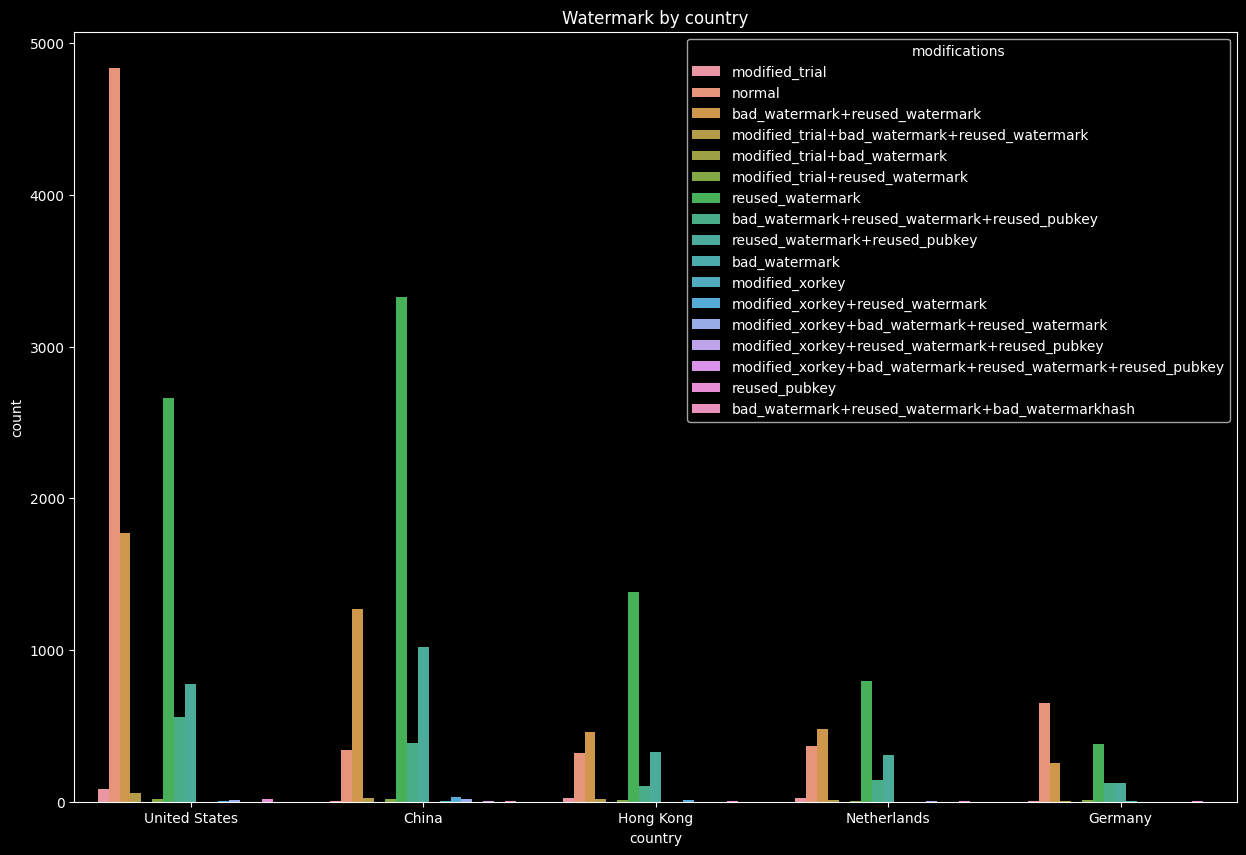

In [149]:
plt.subplots(figsize = (15,10))
sns.countplot(x=combinedDf['country'],order=combinedDf['country'].value_counts().iloc[:5].index,hue=combinedDf['modifications']).set(title='Watermark by country')
plt.show()


#import seaborn as sns
#titanic = sns.load_dataset("titanic")
#sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d",
 #             order=titanic.deck.value_counts().iloc[:3].index)

In [ ]:
#https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering/notebook
#https://www.kaggle.com/code/halflingwizard/clustering-categorical-data-using-gower-distance
#https://www.youtube.com/watch?v=b39_vipRkUo
#https://github.com/nicodv/kmodes/tree/master/examples
#https://towardsdatascience.com/clustering-datasets-having-both-numerical-and-categorical-variables-ed91cdca0677
#https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad
#https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
#https://www.linkedin.com/pulse/use-gower-distance-measure-diversity-bjoern-zapadlo/
#https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553
#https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/
#https://github.com/Sreemanto/Gower-s-Distance/blob/master/Gower's%20Measure.ipynb
#https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
#https://seaborn.pydata.org/tutorial/categorical.html
#https://www.kaggle.com/code/rocossa/dendrogram-hierarchical-clustering/notebook


Cramer/Pearson